In [2]:
import pandas as pd
import numpy as np

PATH = "//wsl.localhost/Ubuntu/home/mountah_lodia/ecommerce_project/data/raw/data.csv"
df = pd.read_csv(PATH, encoding="ISO-8859-1")

print("Shape:", df.shape)
df.head()


Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

df['line_total'] = df['Quantity'] * df['UnitPrice']
df['is_return'] = df['InvoiceNo'].astype(str).str.startswith("C")


In [5]:
# Valeurs manquantes
df['CustomerID'] = df['CustomerID'].fillna(0).astype(int)
df['Country'] = df['Country'].astype('category')

# Suppression des lignes avec des valeurs manquantes critiques
df_cleaned = df.dropna(subset=['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate'])
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0] 
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]
df_cleaned = df_cleaned[df_cleaned['CustomerID'] != 0]
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.info()
df_cleaned.isna().sum()
df_cleaned.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  category      
 8   line_total   397884 non-null  float64       
 9   is_return    397884 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 23.5+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,line_total,is_return
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False


In [6]:
# Dates hors-range
min_date = pd.Timestamp('2010-12-01')
max_date = pd.Timestamp('2011-12-31')   
df_cleaned = df_cleaned[(df_cleaned['InvoiceDate'] >= min_date) & (df_cleaned['InvoiceDate'] <= max_date)]
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.info()
df_cleaned.isna().sum()
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  category      
 8   line_total   397884 non-null  float64       
 9   is_return    397884 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 23.5+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,line_total,is_return
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False


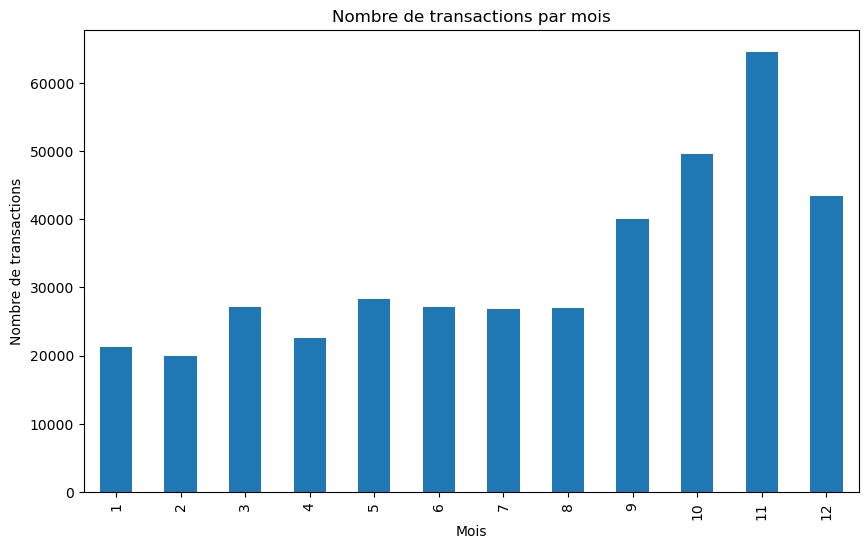

In [8]:
# Visualisations essentielles
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
df_cleaned['InvoiceDate'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Nombre de transactions par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de transactions')
plt.show()



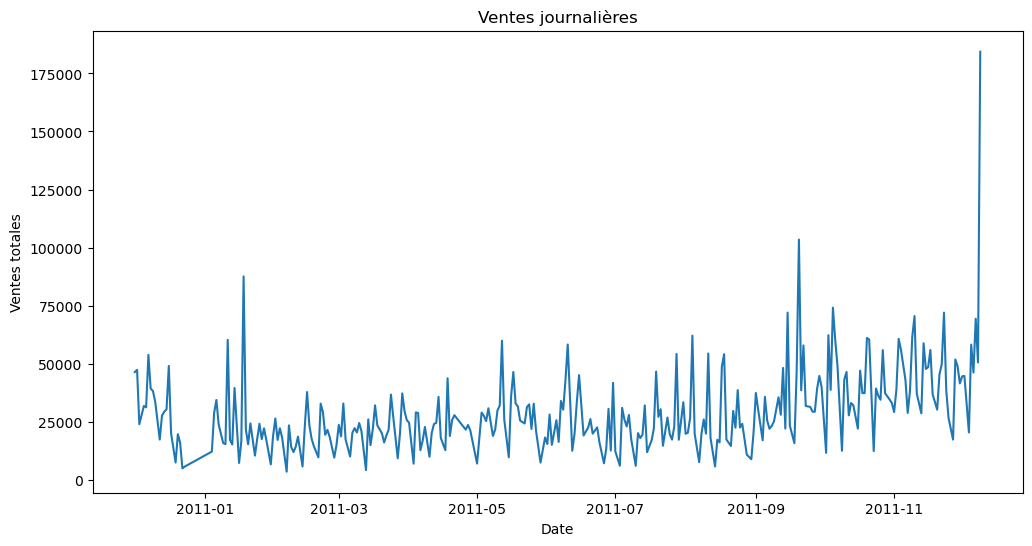

In [9]:
# Ventes journalières 
daily_sales = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.date)['line_total'].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Ventes journalières')
plt.xlabel('Date')
plt.ylabel('Ventes totales')
plt.show()

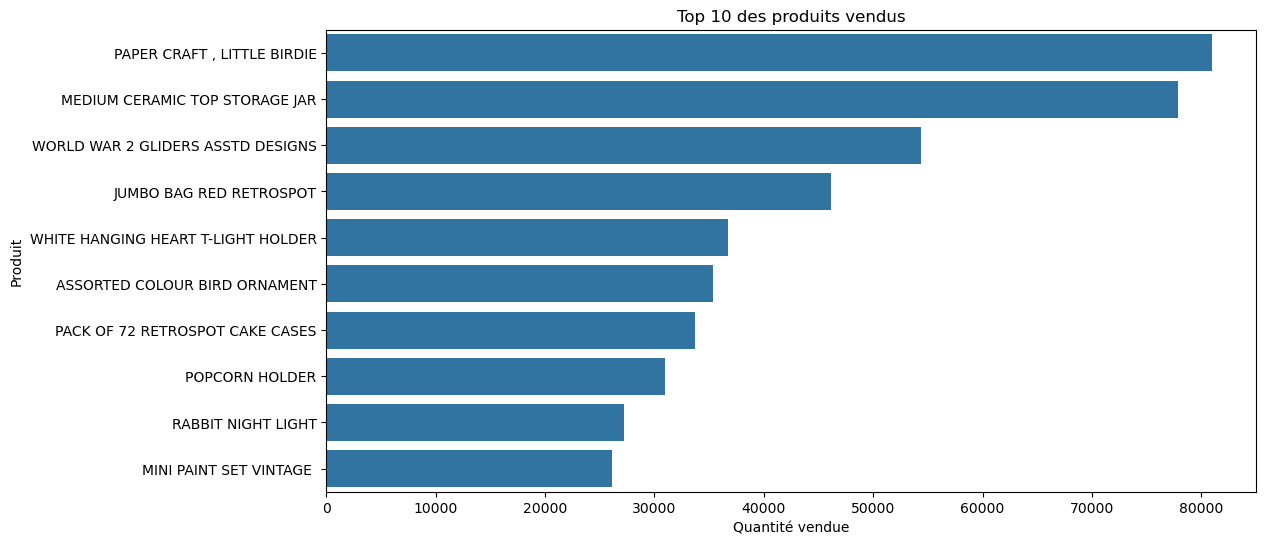

In [10]:
# Top 10 produits vendus
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 des produits vendus')
plt.xlabel('Quantité vendue')
plt.ylabel('Produit')
plt.show()

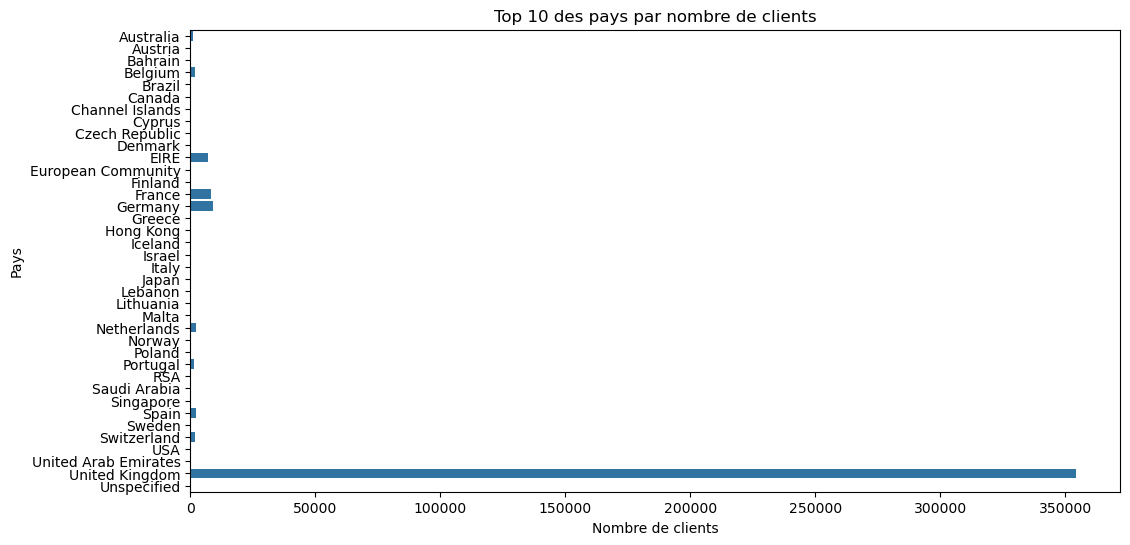

In [11]:
# Répartition des clients par pays
plt.figure(figsize=(12, 6))
country_counts = df_cleaned['Country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 des pays par nombre de clients')
plt.xlabel('Nombre de clients') 
plt.ylabel('Pays')
plt.show()

In [13]:
# Export d’un échantillon pour les prochaines étapes
# Chemin du fichier Parquet pour l'échantillon
sample_path_parquet = "//wsl.localhost/Ubuntu/home/mountah_lodia/ecommerce_project/data/sample/cleaned_data_sample.parquet"

# On prend 10% du DataFrame nettoyé comme échantillon
df_cleaned.sample(frac=0.1, random_state=42)\
    .to_parquet(sample_path_parquet, index=False)

# Chemin du fichier Parquet pour le dataset complet nettoyé
full_path_parquet = "//wsl.localhost/Ubuntu/home/mountah_lodia/ecommerce_project/data/clean/ecommerce_cleaned.parquet"

# Sauvegarde du DataFrame complet
df_cleaned.to_parquet(full_path_parquet, index=False)
 